In [1]:
##Import the relevant packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds


#from datetime import datetime
from datetime import datetime as dt
from packaging import version

from tensorflow import keras

import numpy as np

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

c:\users\prade\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
c:\users\prade\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\prade\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


TensorFlow version:  2.0.0-alpha0


In [2]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_val.shape

(10000, 28, 28)

In [6]:
y_val.shape

(10000,)

In [7]:
import matplotlib.pyplot as plt

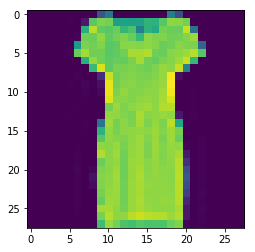

In [8]:
plt.figure()
plt.imshow(np.squeeze(x_train[20]))

#different types of clothing:
Label Description 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

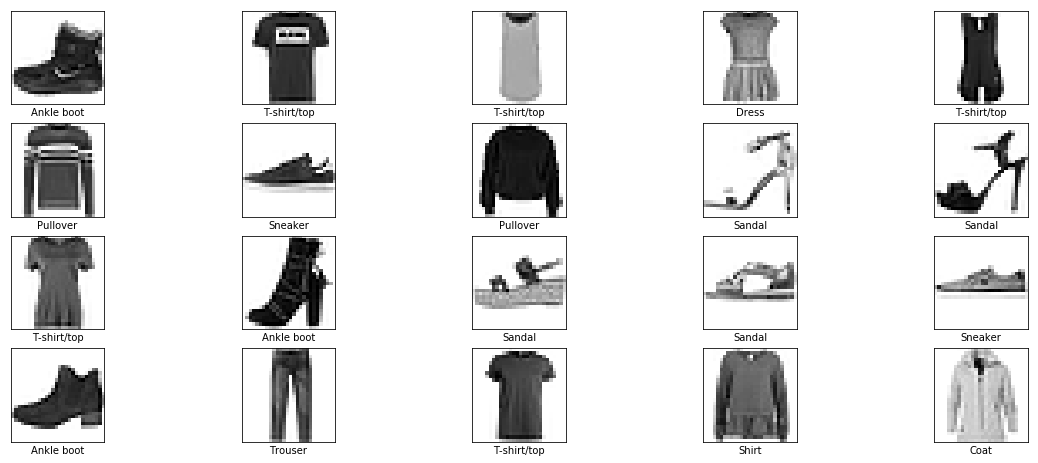

In [10]:
### Plot the 1st 20 Images in X Train

plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_val = x_val.reshape((10000, 28, 28, 1))

In [16]:
#The pixel values for the images lie between 0 to 255 now, which is a large range.
#Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255
x_train_nor = x_train / 255.0
y_train_nor = y_train / 255.0

In [24]:
#log_dir="D:/DS/logs/scalars/"
import os as os
log_dir = os.path.join("logs", "fit", dt.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

NUM_EPOCHS = 10
data_size = 1000
# 80% of the data is for training.
train_pct = 0.8

train_size = int(data_size * train_pct)
BATCH_SIZE = 100

input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')   
                            ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training ... With parameters, this may take more than 10 seconds.")
training_history = model.fit(
    x_train, # input
    y_train, # output
    batch_size=BATCH_SIZE,
    verbose=2, # Suppress chatty output; use Tensorboard instead
    epochs=NUM_EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With parameters, this may take more than 10 seconds.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 6s - loss: 3.6932 - accuracy: 0.7092 - val_loss: 1.0004 - val_accuracy: 0.7413
Epoch 2/10
60000/60000 - 3s - loss: 0.7884 - accuracy: 0.7773 - val_loss: 0.7210 - val_accuracy: 0.7829
Epoch 3/10
60000/60000 - 5s - loss: 0.6119 - accuracy: 0.8042 - val_loss: 0.6480 - val_accuracy: 0.7966
Epoch 4/10
60000/60000 - 4s - loss: 0.5567 - accuracy: 0.8168 - val_loss: 0.5884 - val_accuracy: 0.8072
Epoch 5/10
60000/60000 - 4s - loss: 0.5278 - accuracy: 0.8218 - val_loss: 0.7041 - val_accuracy: 0.7927
Epoch 6/10
60000/60000 - 3s - loss: 0.5001 - accuracy: 0.8304 - val_loss: 0.5579 - val_accuracy: 0.8125
Epoch 7/10
60000/60000 - 3s - loss: 0.4864 - accuracy: 0.8338 - val_loss: 0.5131 - val_accuracy: 0.8283
Epoch 8/10
60000/60000 - 4s - loss: 0.4677 - accuracy: 0.8393 - val_loss: 0.5369 - val_accuracy: 0.8219
Epoch 9/10
60000/60000 - 3s - loss: 0.4634 - accurac

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [25]:
##Test the model##
test_loss, test_accuracy = model.evaluate(x_val, y_val)

10000/10000 [==============================] - ETA: 1s - loss: 0.8756 - accuracy: 0.75 - ETA: 0s - loss: 0.5694 - accuracy: 0.80 - ETA: 0s - loss: 0.5195 - accuracy: 0.81 - ETA: 0s - loss: 0.5395 - accuracy: 0.80 - ETA: 0s - loss: 0.5404 - accuracy: 0.80 - ETA: 0s - loss: 0.5384 - accuracy: 0.81 - ETA: 0s - loss: 0.5498 - accuracy: 0.80 - ETA: 0s - loss: 0.5605 - accuracy: 0.80 - ETA: 0s - loss: 0.5668 - accuracy: 0.80 - ETA: 0s - loss: 0.5625 - accuracy: 0.81 - ETA: 0s - loss: 0.5543 - accuracy: 0.81 - ETA: 0s - loss: 0.5547 - accuracy: 0.81 - ETA: 0s - loss: 0.5555 - accuracy: 0.81 - 1s 67us/sample - loss: 0.5531 - accuracy: 0.8110


In [26]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.55. Test accuracy: 81.10%


In [27]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


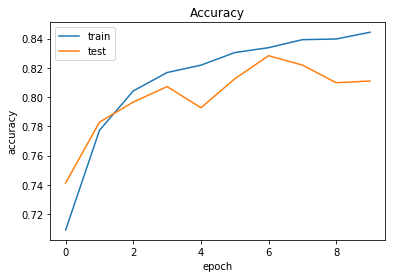

In [30]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

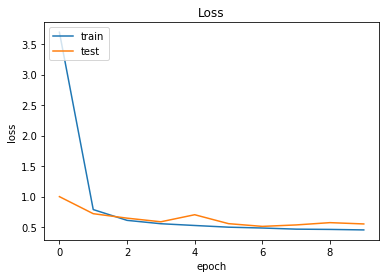

In [32]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Making predictions on Test dataset
predicted_test_labels = model.predict(x_val)

In [36]:
predicted_test_labels.shape

(10000, 10)

In [37]:
predicted_test_labels[88]

array([9.9941051e-01, 7.4124455e-07, 4.7883679e-09, 9.2321287e-05,
       3.9903541e-12, 2.2937571e-21, 4.9644290e-04, 2.4955391e-26,
       5.6962493e-09, 3.1908800e-27], dtype=float32)

In [42]:
y_val[88]

0

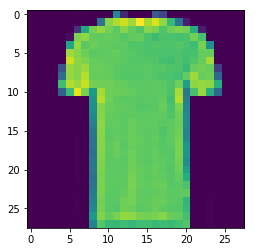

In [40]:
plt.figure()
plt.imshow(np.squeeze(x_val[88]))

In [43]:
y_val[880]

7

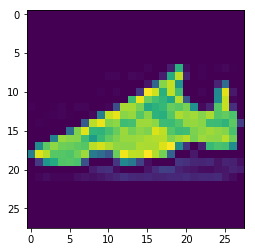

In [44]:
plt.figure()
plt.imshow(np.squeeze(x_val[880]))